In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


📊 최근 200 일 기준 상관관계 행렬:
          SOYB       AFL        BG        CF        CI      CPRT      CTVA       EXE       HIG  \
SOYB  1.000000 -0.053277  0.158338  0.101336 -0.033330 -0.036771  0.151728  0.032833 -0.090513   
AFL  -0.053277  1.000000  0.168792  0.171741  0.160793  0.252013  0.235109  0.149011  0.595896   
BG    0.158338  0.168792  1.000000  0.350391  0.274966  0.010345  0.276439  0.108395  0.162340   
CF    0.101336  0.171741  0.350391  1.000000  0.161143  0.021383  0.373240  0.152834  0.121940   
CI   -0.033330  0.160793  0.274966  0.161143  1.000000  0.059020  0.151111 -0.019153  0.249700   
CPRT -0.036771  0.252013  0.010345  0.021383  0.059020  1.000000  0.204500  0.222291  0.294407   
CTVA  0.151728  0.235109  0.276439  0.373240  0.151111  0.204500  1.000000  0.218978  0.269149   
EXE   0.032833  0.149011  0.108395  0.152834 -0.019153  0.222291  0.218978  1.000000  0.193644   
HIG  -0.090513  0.595896  0.162340  0.121940  0.249700  0.294407  0.269149  0.193644  1.000000 

<ipython-input-14-b4e30acdf31a>:55: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-b4e30acdf31a>:55: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-b4e30acdf31a>:55: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-b4e30acdf31a>:55: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-b4e30acdf31a>:55: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-b4e30acdf31a>:55: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-b4e30acdf31a>:55: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipyth

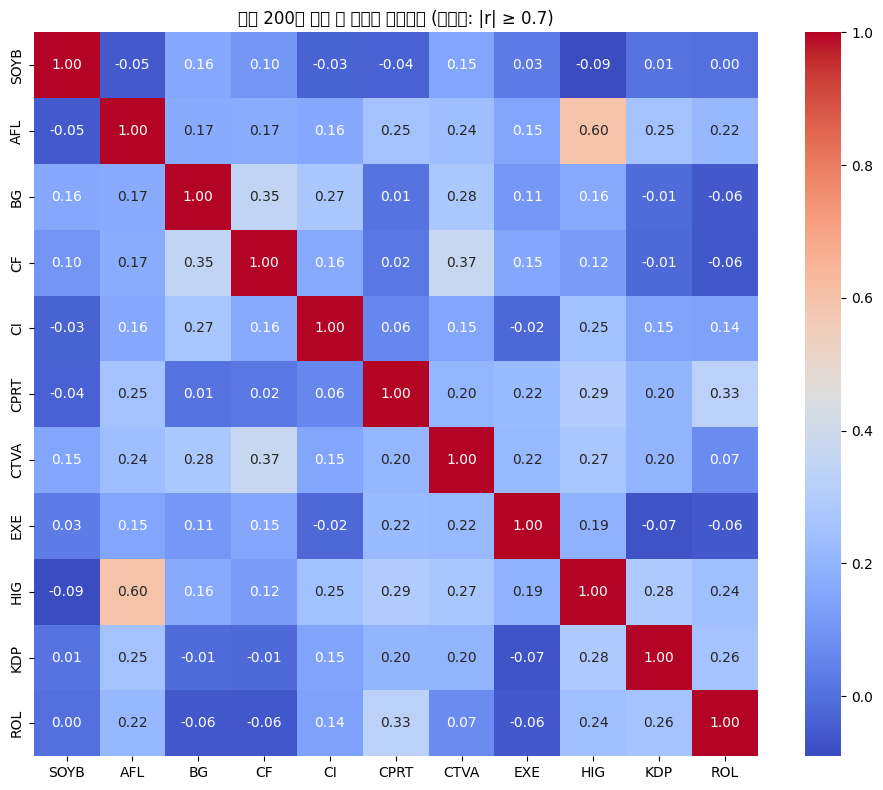


✅ 최근 200일 기준 |상관계수| ≥ 0.7 인 종목쌍 없음.


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from datetime import datetime

# Parameters
N = 200  # Last N rows
C = 0.7  # Correlation threshold (absolute value)

# Paths
symbols_path = "/content/drive/MyDrive/Data/FNC/TT_Long_List.csv"
data_folder = "/content/drive/MyDrive/Data/FNC/Historical_Data"

# Load symbols
symbols_df = pd.read_csv(symbols_path)
symbols = symbols_df['[Symbol]'].dropna().unique().tolist()

# Initialize
price_data = pd.DataFrame()
excluded_symbols = []

# Load and merge adjusted close prices
for symbol in symbols:
    file_path = os.path.join(data_folder, f"{symbol}.csv")
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        excluded_symbols.append(symbol)
        continue

    df = pd.read_csv(file_path)
    if 'Date' not in df.columns or 'Adj Close' not in df.columns:
        excluded_symbols.append(symbol)
        continue

    if len(df) < N:
        excluded_symbols.append(symbol)
        continue

    df = df.tail(N).reset_index(drop=True)
    df = df[['Adj Close']].rename(columns={'Adj Close': symbol})

    if price_data.empty:
        price_data = df
    else:
        price_data = pd.concat([price_data, df], axis=1)

# Drop rows with any missing values
price_data = price_data.dropna()

# Calculate returns
returns = price_data.pct_change().dropna()

# Correlation matrix
correlation_matrix = returns.corr()

# Print matrix
print(f"📊 Correlation matrix (last {N} rows):")
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title(f"Correlation of Returns (Last {N} Rows, |r| ≥ {C})")
plt.tight_layout()
plt.show()

# Find strong correlation pairs
strong_pairs = []
valid_symbols = correlation_matrix.columns.tolist()

for sym1, sym2 in combinations(valid_symbols, 2):
    corr = correlation_matrix.loc[sym1, sym2]
    if abs(corr) >= C:
        strong_pairs.append((sym1, sym2, corr))

# Display pairs
if strong_pairs:
    print(f"\n✅ Pairs with |correlation| ≥ {C} (Last {N} rows):")
    for s1, s2, r in strong_pairs:
        print(f"  - {s1} & {s2}: correlation = {r:.2f}")
else:
    print(f"\n✅ No pairs found with |correlation| ≥ {C} in the last {N} rows.")

# Display excluded symbols
if excluded_symbols:
    print("\n⚠️ Excluded symbols due to insufficient data (< {} rows):".format(N))
    for sym in excluded_symbols:
        print(f"  - {sym}")

# Save results
now_str = datetime.now().strftime("%Y%m%d_%H%M%S")
output_path = f"/content/drive/MyDrive/Data/FNC/TT_Corr_Result_{now_str}.csv"

# 1. Save correlation matrix
correlation_matrix.to_csv(output_path, index=True)

# 2. Append strong pairs
with open(output_path, 'a') as f:
    f.write(f"\n\nPairs with |correlation| ≥ {C:.2f} (Last {N} rows)\n")
    f.write("Symbol 1,Symbol 2,Correlation\n")
    if strong_pairs:
        for s1, s2, r in strong_pairs:
            f.write(f"{s1},{s2},{r:.4f}\n")
    else:
        f.write("None\n")

# 3. Append excluded symbols
with open(output_path, 'a') as f:
    f.write(f"\n\nExcluded symbols (data length < {N} rows):\n")
    if excluded_symbols:
        for sym in excluded_symbols:
            f.write(f"{sym}\n")
    else:
        f.write("None\n")
